Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The goal is to predict the price based on some selected features.

For more information:

https://www.kaggle.com/vikrishnan/boston-house-prices

# Loading packages

In [32]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
print('Done!')



Done!


In [33]:
## Loading a single file
inp= pd.read_csv('Boston_Housing_clean.csv')
print('Size and dim the table = ',inp.shape)
print('Done!')

Size and dim the table =  (20640, 12)
Done!


In [34]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   Unnamed: 0.1        20640 non-null  int64  
 2   longitude           20640 non-null  float64
 3   latitude            20640 non-null  float64
 4   housing_median_age  20640 non-null  float64
 5   total_rooms         20640 non-null  float64
 6   total_bedrooms      20640 non-null  float64
 7   population          20640 non-null  float64
 8   households          20640 non-null  float64
 9   median_income       20640 non-null  float64
 10  median_house_value  20640 non-null  float64
 11  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 1.9+ MB


# making the training set

In [35]:
#Slecting input features from the single file and choosing a column as the target

X= inp[["longitude","latitude","housing_median_age" ,"total_rooms","total_bedrooms",
        "population","households","median_income",]].values

Y = inp[["median_house_value"]].values



print('Size and dim X (input): ', X.shape)
print('Size and dim Y (target): ', Y.shape)

Size and dim X (input):  (20640, 8)
Size and dim Y (target):  (20640, 1)


# Exploring the data and seeing the distribution of a selected column

Text(0.5, 0, 'X2')

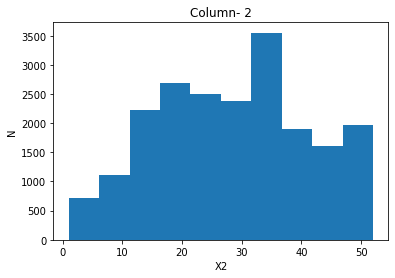

In [37]:
# Choose a column to see the distribution

n_column = 2

plt.hist(X[:,n_column])
plt.title('Column- '+str(n_column))
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

# Randomly separate samples to the training set (75%) and validation set (25%). The corresponding targets are also separated. 

In [38]:
from sklearn.model_selection import train_test_split
X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y ,test_size=0.2)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

training set ==  (16512, 8) (16512, 1) ,, validation set ==  (4128, 8) (4128, 1)


# Normalization.


In [39]:
#Line #1: Import a model, for normalization, like StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

#Line #2: fitting (finding the parameters of the model based on the training set). Assign a name (scaler_S which can transform a new data after training)

#Line #3: Predicted (transformed) values for the training set

#Line #4: Predicted (transformed) values for the validation set (using the model that has been trained using the training set).


from sklearn.preprocessing import StandardScaler, MinMaxScaler  #line #1

scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3

X_va_Norm= scaler_S.transform(X_va)  # Line #4

print('Done!')

Done!


# Comparing the distributions from the nomalized training and validation sets

Text(0.5, 0, 'X2')

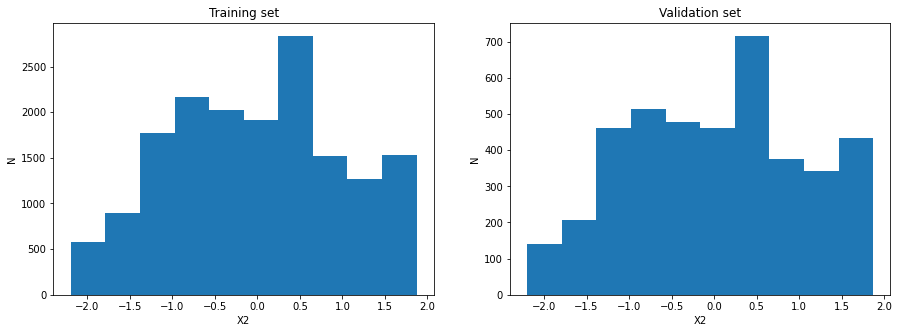

In [41]:
n_column = 2

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(X_tr_Norm[:,n_column])
plt.title('Training set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))


plt.subplot(1, 2, 2)
plt.hist(X_va_Norm[:,n_column])
plt.title('Validation set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

In [9]:
# Change the shape of the target (if you have a one-component  target )
# Y=np.reshape(Y,-1)
# print(np.shape(X),np.shape(Y))   

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(700000, 300000, '$\\mu=752.9983$\n$\\mathrm{med}=-13179.9060$\n$\\sigma=143705.3315$')

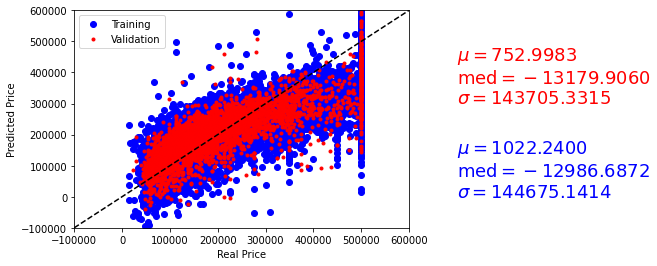

In [45]:

reg= linear_model.SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.000001, l1_ratio=0.15, 
                                        fit_intercept=True, max_iter=10000, tol=0.001, shuffle=True, verbose=0, 
                                        epsilon=0.1, random_state=None, learning_rate='constant', eta0=0.001, 
                                        power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                                        n_iter_no_change=5, warm_start=False, average=False)


reg.fit (X_tr_Norm,Y_tr)  # fit the model with training set

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)


plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

#plt.plot(np.arange(-100000,600000,10000),  np.arange(0,2,.1),'-k')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.legend(['Training', 'Validation'])
plt.xlim([-100000,600000])
plt.ylim([-100000,600000])
plt.plot([-100000,600000],[-100000,600000],'--k')
#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)


plt.text(700000,100,textstr, color='b',fontsize=18)
plt.text(700000,300000,textstrv, color='r',fontsize=18)


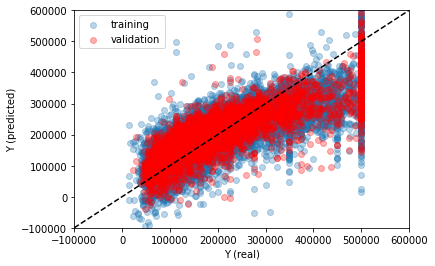

In [46]:
# The same as above, with different visualization
plt.scatter(Y_tr,Y_tr_pred,label='training',alpha=.3)
plt.scatter(Y_va,Y_va_pred,label='validation',color='r',alpha=.3) 
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.xlim([-100000,600000])
plt.ylim([-100000,600000])
plt.plot([-100000,600000],[-100000,600000],'--k')
plt.legend()

In [47]:
#Make the target and predicted values as a column vector

Y_tr_pred= np.reshape(Y_tr_pred,(-1,1))
Y_tr= np.reshape(Y_tr,(-1,1))

Y_va_pred= np.reshape(Y_va_pred,(-1,1))
Y_va= np.reshape(Y_va,(-1,1))

# Comparing predicted and actual values

mean =  -1022.2400065220736
median =  11350.293191369856
SD =  70216.61753522491


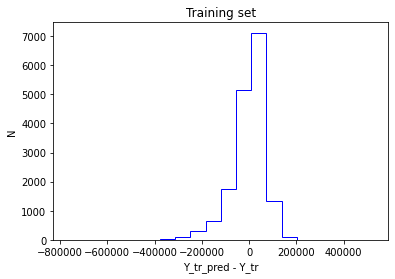

In [49]:
# Inspect the distribution of the difference between the predicted and actual values for the training set (A Gaussian distribution is expected)
plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step')
plt.xlabel('Y_tr_pred - Y_tr')
plt.ylabel('N')
plt.title('Training set')
print ('mean = ',np.mean(Y_tr_pred-Y_tr) )
print ('median = ',np.median(Y_tr_pred-Y_tr) )
print ('SD = ',np.std(Y_tr_pred-Y_tr) )

mean =  -5701.138867183051
median =  7110.81150483778
SD =  73662.81749312865


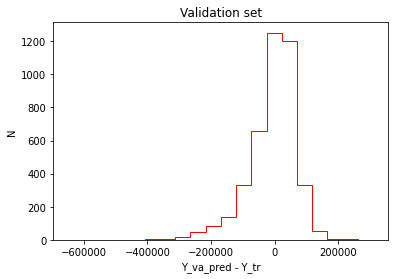

In [22]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set (A Gaussian distribution is expected)
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step')
plt.xlabel('Y_va_pred - Y_tr')
plt.ylabel('N')
plt.title('Validation set')

print ('mean = ',np.mean(Y_va_pred-Y_va) )
print ('median = ',np.median(Y_va_pred-Y_va) )
print ('SD = ',np.std(Y_va_pred-Y_va) )

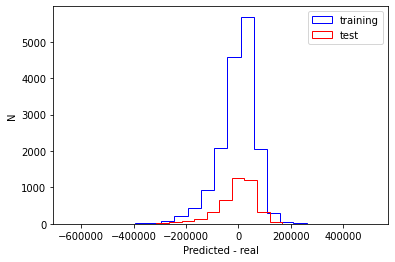

In [23]:
# Inspect the distribution of the difference between the predicted and actual values for the two sets (A Gaussian distribution is expected)

plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',label='training')
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',label='test')
plt.xlabel('Predicted - real')
plt.ylabel('N')
plt.legend()



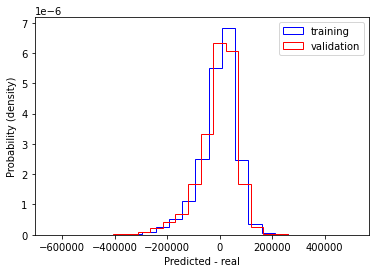

In [24]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.

plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
plt.xlabel('Predicted - real')
plt.ylabel('Probability (density)')
plt.legend()


# Inspecting systematic errors.  The best is to have asymmetric Gaussian density around the dashed line

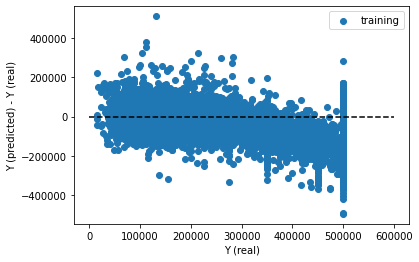

In [25]:
# Inspecting systematic errors for the training set
plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([0,1.5],[0,0],'--k')
#plt.ylim([-1,1])
plt.legend()

# plt.xlim([-100000,600000])
# plt.ylim([-100000,600000])
plt.plot([-0,600000],[0,0],'--k')

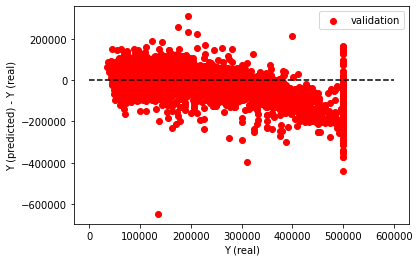

In [26]:
# Inspecting systematic errors for the validation set
plt.scatter(Y_va,Y_va_pred-Y_va,label='validation',color='r')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([-0,600000],[0,0],'--k')
#plt.ylim([-1,1])
plt.legend()

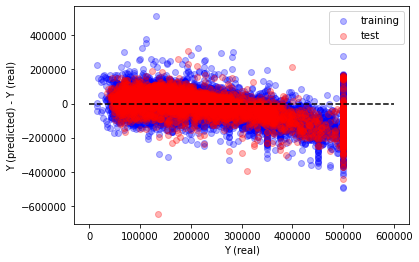

In [27]:
# Inspecting systematic errors for the training set and validation set together 

plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([-0,600000],[0,0],'--k')
#plt.ylim([-1,1])
plt.legend()

In [28]:
degree= 2

# for example, if  degree = 2 and if we have 7 columns, then the following line creates a table of 36 
#columns of the possible combination to power 2combinations
poly = PolynomialFeatures(degree,include_bias=False)


poly.fit(X_tr_Norm)  # fitting the model based on the training set

X_tr_Norm_Ext=poly.transform(X_tr_Norm)  # transforming the training set 

X_va_Norm_Ext=poly.transform(X_va_Norm)  # transforming the validation set 

print ('size and dimension of training set = ', np.shape(X_tr_Norm_Ext))
print ('size and dimension of validation set = ', np.shape(X_va_Norm_Ext))

size and dimension of training set =  (16512, 44)
size and dimension of validation set =  (4128, 44)


c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(700000, 300000, '$\\mu=-445156985856.6163$\n$\\mathrm{med}=-91630047973.9957$\n$\\sigma=4209069783905.7964$')

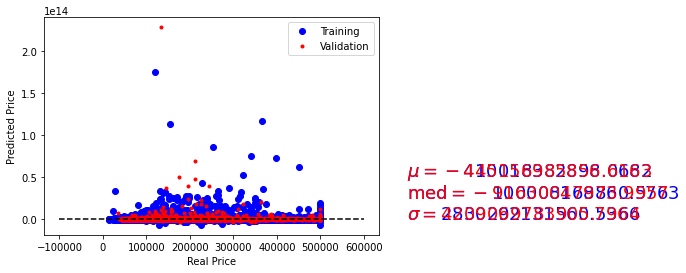

In [29]:

reg= linear_model.SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.01, l1_ratio=0.15, 
                                        fit_intercept=True, max_iter=10000, tol=0.001, shuffle=True, verbose=0, 
                                        epsilon=0.1, random_state=None, learning_rate='constant', eta0=0.01, 
                                        power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                                        n_iter_no_change=5, warm_start=False, average=False)


reg.fit (X_tr_Norm_Ext,Y_tr)  # fit the model with training set

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm_Ext)  
Y_va_pred= reg.predict(X_va_Norm_Ext)


plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

#plt.plot(np.arange(-100000,600000,10000),  np.arange(0,2,.1),'-k')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.legend(['Training', 'Validation'])
#plt.xlim([-100000,600000])
#plt.ylim([-100000,600000])
plt.plot([-100000,600000],[-100000,600000],'--k')
#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)


plt.text(700000,100,textstr, color='b',fontsize=18)
plt.text(700000,300000,textstrv, color='r',fontsize=18)


In [30]:
#Make the target and predicted values as a column vector
Y_tr_pred= np.reshape(Y_tr_pred,(-1,1))
Y_tr= np.reshape(Y_tr,(-1,1))

Y_va_pred= np.reshape(Y_va_pred,(-1,1))
Y_va= np.reshape(Y_va,(-1,1))

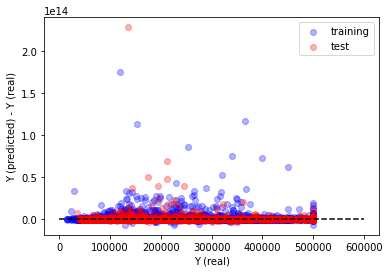

In [31]:
# Inspecting systematic errors for the training set and validation set together 

plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([-0,600000],[0,0],'--k')
#plt.ylim([-1,1])
plt.legend()